In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('house_prices_data.csv')
df.head()

,Square_Footage,Num_Bedrooms,House_Age,House_Price
0,3674,1,61,608468.940708
1,1360,5,57,335254.995658
2,1794,5,51,402370.090653
3,1630,2,11,311854.298045
4,1595,5,38,379356.590435


In [36]:
df.shape

(100, 4)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  100 non-null    int64  
 1   Num_Bedrooms    100 non-null    int64  
 2   House_Age       100 non-null    int64  
 3   House_Price     100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


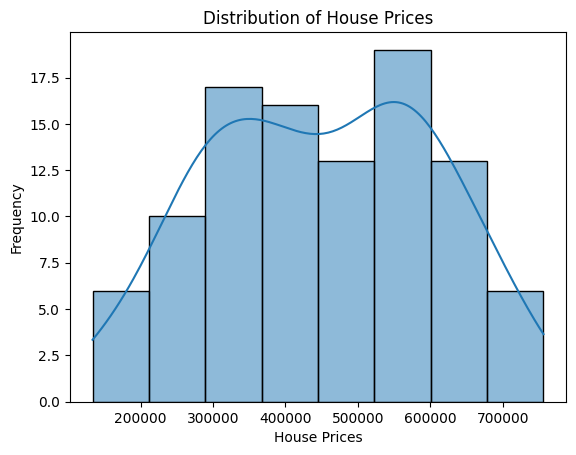

In [39]:

# Assuming your DataFrame is named df and it has a column named 'house_price'
# Create the distribution plot
sns.histplot(df['House_Price'], kde=True)

# Add labels and title
plt.xlabel('House Prices')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

# Show the plot
plt.show()

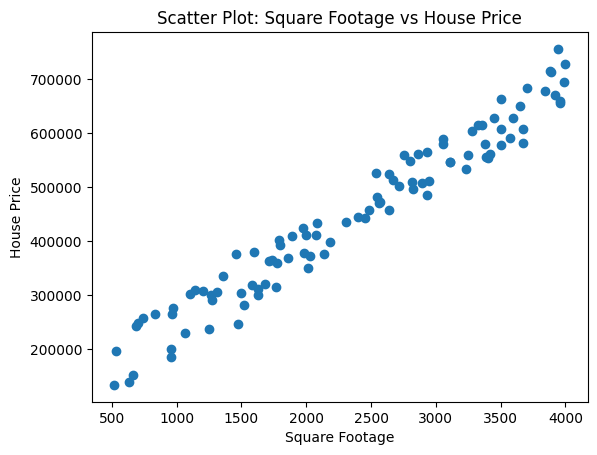

In [40]:

plt.scatter(df['Square_Footage'], df['House_Price'])
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.title('Scatter Plot: Square Footage vs House Price')
plt.show()

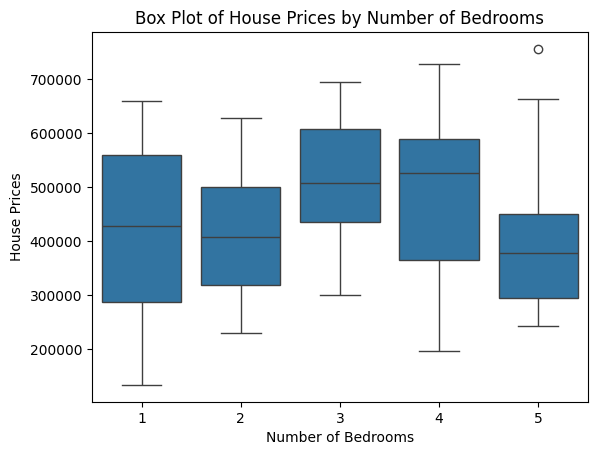

In [41]:
# Assuming your DataFrame is named df and it has columns 'bedrooms' and 'house_price'
# Create the box plot
sns.boxplot(x='Num_Bedrooms', y='House_Price', data=df)

# Add labels and title
plt.xlabel('Number of Bedrooms')
plt.ylabel('House Prices')
plt.title('Box Plot of House Prices by Number of Bedrooms')

# Show the plot
plt.show()

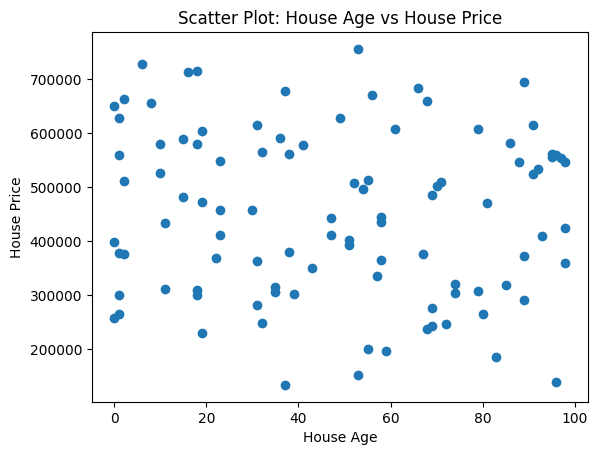

In [42]:

plt.scatter(df['House_Age'], df['House_Price'])
plt.xlabel('House Age')
plt.ylabel('House Price')
plt.title('Scatter Plot: House Age vs House Price')
plt.show()

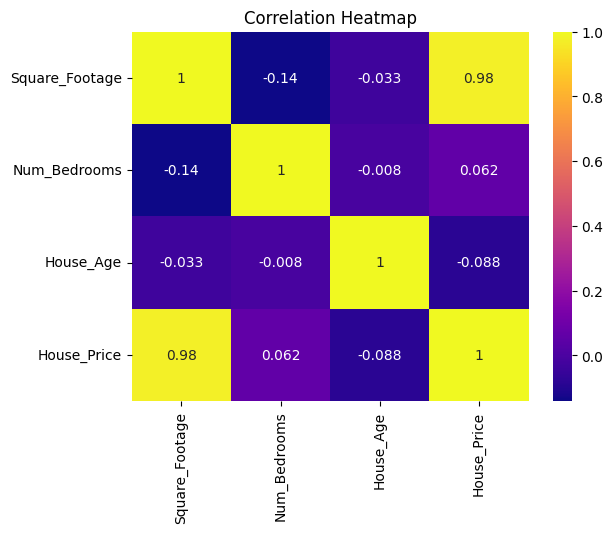

In [43]:
# Assuming your DataFrame is named df
# Create the heatmap
sns.heatmap(df.corr(), annot=True, cmap='plasma')

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

In [44]:
x = df.drop(['House_Price'], axis=1)
y = df['House_Price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2 )

In [46]:
X_train

,Square_Footage,Num_Bedrooms,House_Age
35,974,5,69
11,1982,1,1
84,3113,3,98
44,3234,1,92
73,3056,4,15
...,...,...,...
43,3505,3,79
22,3985,3,89
72,3999,4,6
15,3419,1,95


In [47]:
X_test

,Square_Footage,Num_Bedrooms,House_Age
83,3961,1,8
30,3885,4,16
56,1797,5,51
24,2933,1,69
16,630,1,96
23,3353,3,31
2,1794,5,51
27,2824,2,54
28,1684,2,74
13,3944,5,53


In [48]:
y_train

35    275906.298109
11    378049.282185
84    546192.826177
44    533851.125509
73    589086.944577
          ...      
43    608695.889759
22    694694.334473
72    727573.562888
15    561553.872420
40    246469.317518
Name: House_Price, Length: 80, dtype: float64

In [49]:
y_test

83    655967.230860
30    714019.757096
56    392417.343785
24    485518.808103
16    138858.909072
23    615370.289038
2     402370.090653
27    497088.132018
28    320284.166802
13    756310.952144
99    358697.290635
92    248260.617487
76    559287.697894
14    581664.298392
0     608468.940708
21    350876.424719
3     311854.298045
29    199255.987051
61    257055.911694
79    434587.827142
Name: House_Price, dtype: float64

In [50]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
model = lr.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred


array([659503.64379516, 708220.70116662, 404240.36433491, 488661.39197973,
       133412.39069293, 603220.03856929, 403786.4150163 , 496668.21683504,
       319154.70462619, 728615.48290299, 368390.65207843, 243159.67918624,
       540690.06996693, 596072.0688887 , 602791.98213079, 356269.50296689,
       326773.84597847, 193471.68013451, 257232.77058971, 437104.30278806])

In [51]:
df = pd.DataFrame({ "y_test" : y_test , "y_pred" : y_pred , "Diff between y_pred and y_test" : abs(y_pred-y_test)})
df

,y_test,y_pred,Diff between y_pred and y_test
83,655967.230860,659503.643795,3536.412935
30,714019.757096,708220.701167,5799.055929
56,392417.343785,404240.364335,11823.020549
24,485518.808103,488661.391980,3142.583876
16,138858.909072,133412.390693,5446.518379
23,615370.289038,603220.038569,12150.250469
2,402370.090653,403786.415016,1416.324363
27,497088.132018,496668.216835,419.915183
28,320284.166802,319154.704626,1129.462176
13,756310.952144,728615.482903,27695.469241


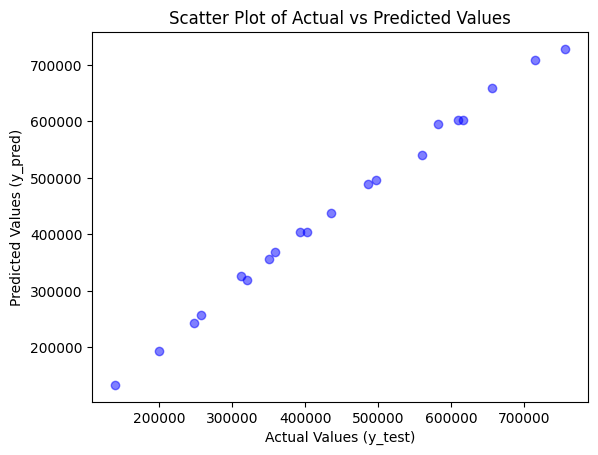

In [52]:

# Create the scatter plot fo visualizing Actual and Predicting values
plt.scatter(y_test, y_pred, alpha=0.5, c='blue')  # Change 'blue' to any color you prefer

# Add labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of Actual vs Predicted Values')

# Show the plot
plt.show()

In [53]:
model.score(X_train, y_train)

0.9958488534311216

In [54]:
print("Intercept of the model (b): \n" , lr.intercept_)

print("="*50)

print("Coefficient of the line (w1 w2 w3):\n" , lr.coef_)

Intercept of the model (b): 
 41403.59684142459
Coefficient of the line (w1 w2 w3):
 [  151.31643954 20740.73841055  -250.63855694]


In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')

print(f'R-squared: {r2}')

Mean Squared Error: 107037485.41926186
R-squared: 0.9963595786710231


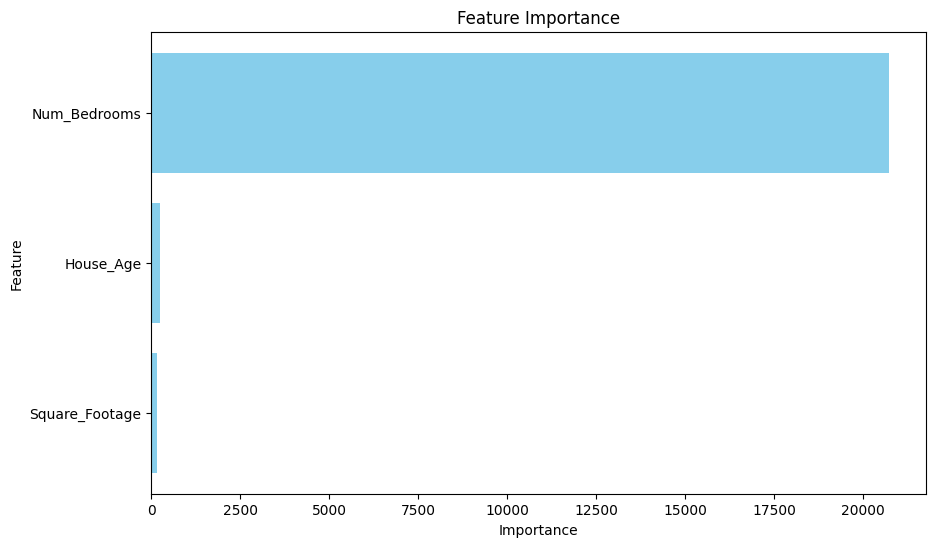

In [56]:

# Assuming your linear regression model is named 'model'
# Extract the coefficients
coefficients = model.coef_

# Assuming your feature names are stored in a list called 'feature_names'
feature_names = ['Square_Footage', 'Num_Bedrooms', 'House_Age']

# Create a DataFrame to hold feature names and their corresponding coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Calculate the absolute value of the coefficients
feature_importance['Importance'] = feature_importance['Coefficient'].abs()

# Sort the DataFrame by the importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

Mean Squared Error: 107037485.41926277
R^2 Score: 0.996359578671023


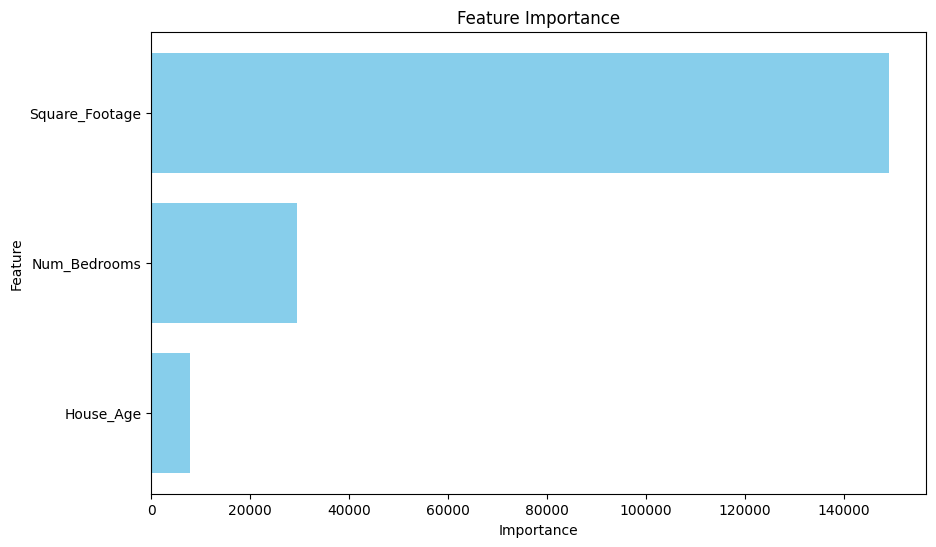

In [57]:

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model on the normalized data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the feature importance
coefficients = model.coef_
feature_names = ['Square_Footage', 'Num_Bedrooms', 'House_Age']
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})
feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [58]:
scaler = StandardScaler()
def predict_house_price(square_footage, num_bedrooms, house_age):
    input_features = pd.DataFrame({
        'Square_Footage': [square_footage],
        'Num_Bedrooms': [num_bedrooms],
        'House_Age': [house_age]
    })
    input_features_scaled = scaler.fit_transform(input_features)
    predicted_price = model.predict(input_features_scaled)
    return predicted_price[0]

predicted_price = predict_house_price(3456, 6, 30)
print(f"Predicted House Price: {predicted_price}")

Predicted House Price: 450971.16368850577
